In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Function to load and combine data for a given subject
def load_and_combine_data(subject):
    data_frames = []

    # Assuming all relevant data files are in the same directory
    directory_path = '/content/drive/MyDrive/dataset/'

    # Loop through all files in the directory for the given subject
    for file_name in os.listdir(directory_path):
        if file_name.startswith(f'S{subject:02d}R') and file_name.endswith('.txt'):
            file_path = os.path.join(directory_path, file_name)
            df = pd.read_csv(file_path, sep=' ', header=None,
                             names=['Time', 'Ankle_X', 'Ankle_Y', 'Ankle_Z',
                                    'UpperLeg_X', 'UpperLeg_Y', 'UpperLeg_Z',
                                    'Trunk_X', 'Trunk_Y', 'Trunk_Z', 'Annotations'])
            data_frames.append(df)

    # Combine data frames for all runs
    combined_df = pd.concat(data_frames, ignore_index=True)
    return combined_df

In [ ]:
# Load and combine data for each subject
subjects = range(1, 11)
all_subjects_data = []

for subject in subjects:
    subject_data = load_and_combine_data(subject)
    all_subjects_data.append(subject_data)

# Combine data frames for all subjects
full_dataset = pd.concat(all_subjects_data, ignore_index=True)


In [ ]:
# Explore and visualize the core characteristics of freezing of gait

# Display basic information about the combined dataset
print(full_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917887 entries, 0 to 1917886
Data columns (total 11 columns):
 #   Column       Dtype
---  ------       -----
 0   Time         int64
 1   Ankle_X      int64
 2   Ankle_Y      int64
 3   Ankle_Z      int64
 4   UpperLeg_X   int64
 5   UpperLeg_Y   int64
 6   UpperLeg_Z   int64
 7   Trunk_X      int64
 8   Trunk_Y      int64
 9   Trunk_Z      int64
 10  Annotations  int64
dtypes: int64(11)
memory usage: 161.0 MB
None


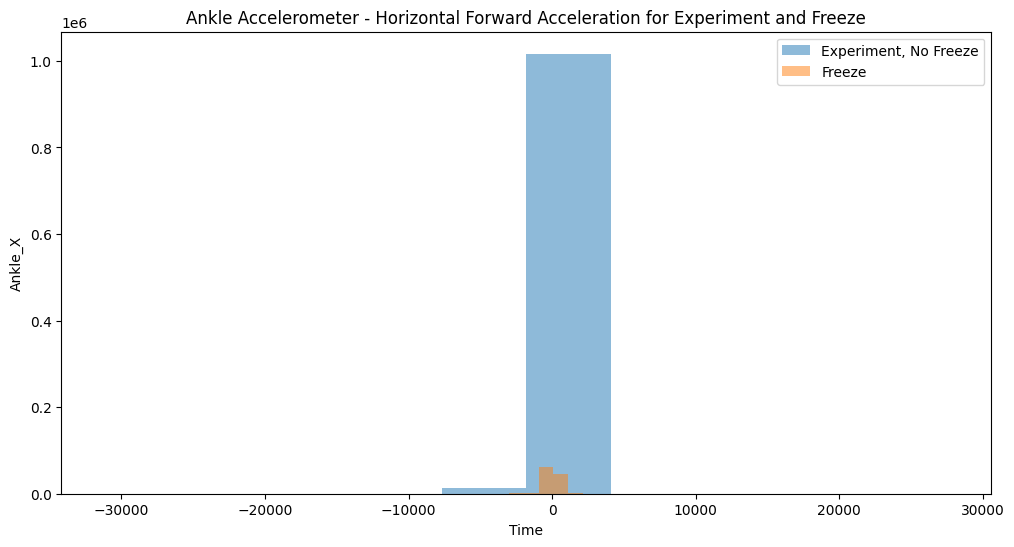

In [ ]:
# Visualize accelerometer values for freezing and normal walking
plt.figure(figsize=(12, 6))
plt.hist(full_dataset[full_dataset['Annotations'] == 1]['Ankle_X'], label='Experiment, No Freeze', alpha=0.5)
plt.hist(full_dataset[full_dataset['Annotations'] == 2]['Ankle_X'], label='Freeze', alpha=0.5)
plt.title('Ankle Accelerometer - Horizontal Forward Acceleration for Experiment and Freeze')
plt.xlabel('Time')
plt.ylabel('Ankle_X')
plt.legend()
plt.show()

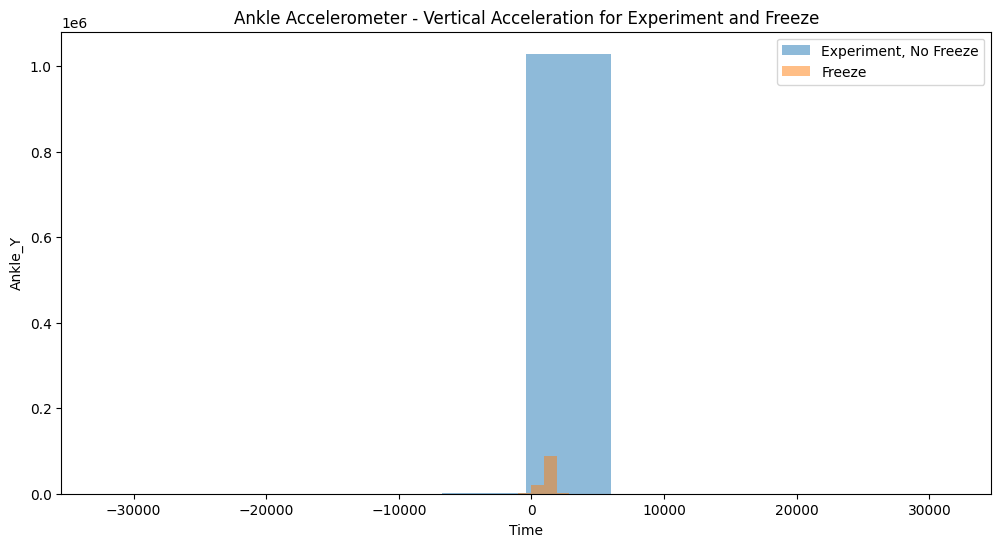

In [ ]:
# Visualize accelerometer values for freezing and normal walking
plt.figure(figsize=(12, 6))
plt.hist(full_dataset[full_dataset['Annotations'] == 1]['Ankle_Y'], label='Experiment, No Freeze', alpha=0.5)
plt.hist(full_dataset[full_dataset['Annotations'] == 2]['Ankle_Y'], label='Freeze', alpha=0.5)
plt.title('Ankle Accelerometer - Vertical Acceleration for Experiment and Freeze')
plt.xlabel('Time')
plt.ylabel('Ankle_Y')
plt.legend()
plt.show()

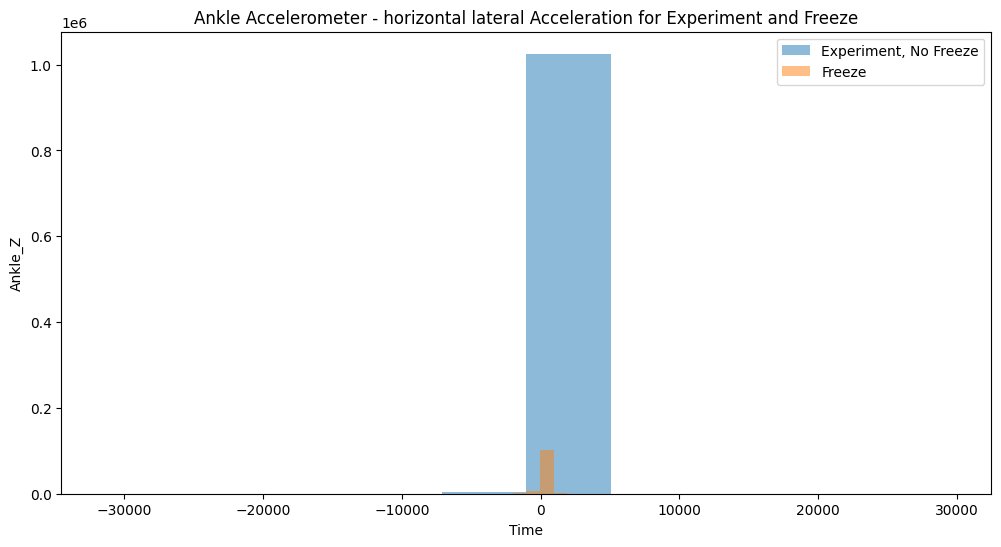

In [ ]:
# Visualize accelerometer values for freezing and normal walking
plt.figure(figsize=(12, 6))
plt.hist(full_dataset[full_dataset['Annotations'] == 1]['Ankle_Z'], label='Experiment, No Freeze', alpha=0.5)
plt.hist(full_dataset[full_dataset['Annotations'] == 2]['Ankle_Z'], label='Freeze', alpha=0.5)
plt.title('Ankle Accelerometer - horizontal lateral Acceleration for Experiment and Freeze')
plt.xlabel('Time')
plt.ylabel('Ankle_Z')
plt.legend()
plt.show()

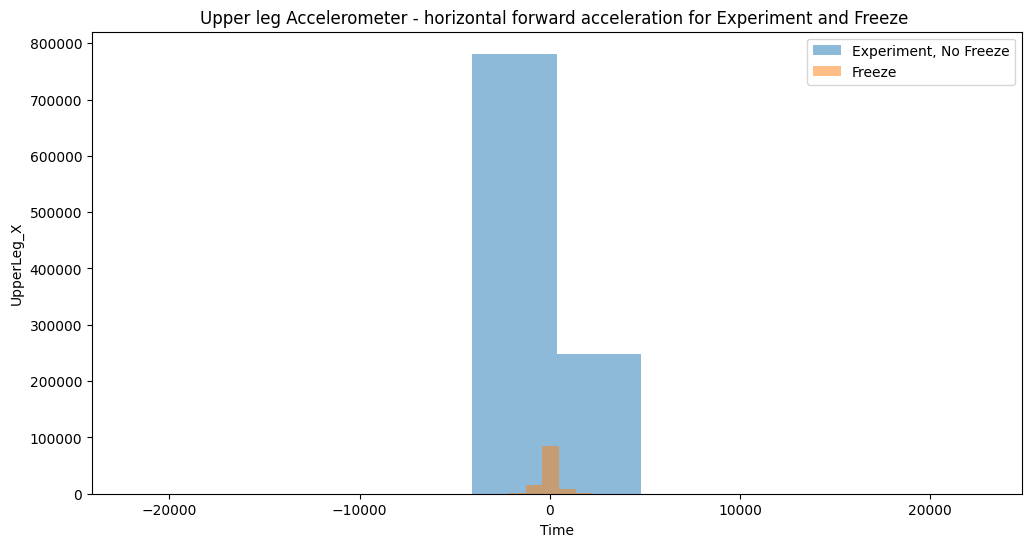

In [ ]:
# Visualize accelerometer values for freezing and normal walking
plt.figure(figsize=(12, 6))
plt.hist(full_dataset[full_dataset['Annotations'] == 1]['UpperLeg_X'], label='Experiment, No Freeze', alpha=0.5)
plt.hist(full_dataset[full_dataset['Annotations'] == 2]['UpperLeg_X'], label='Freeze', alpha=0.5)
plt.title('Upper leg Accelerometer - horizontal forward acceleration for Experiment and Freeze ')
plt.xlabel('Time')
plt.ylabel('UpperLeg_X')
plt.legend()
plt.show()

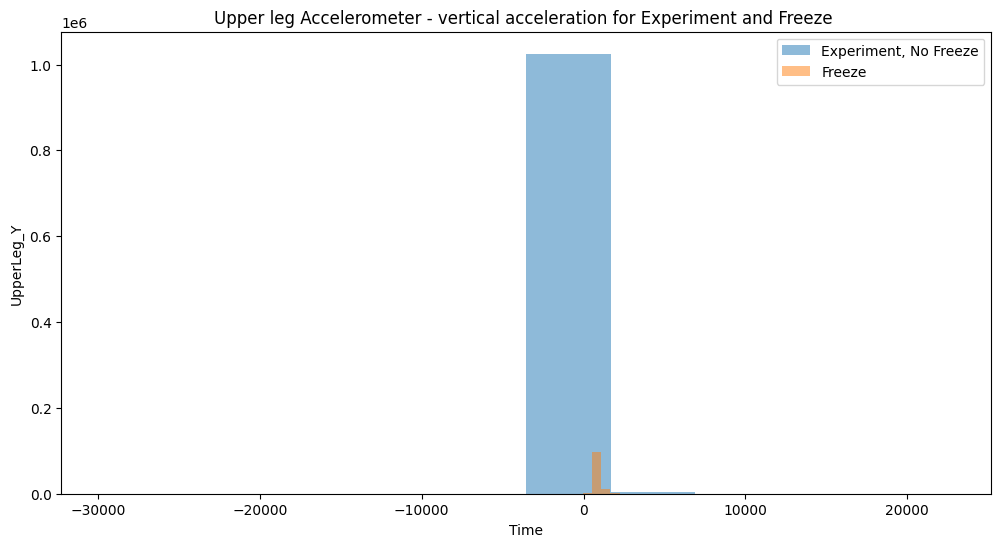

In [ ]:
# Visualize accelerometer values for freezing and normal walking
plt.figure(figsize=(12, 6))
plt.hist(full_dataset[full_dataset['Annotations'] == 1]['UpperLeg_Y'], label='Experiment, No Freeze', alpha=0.5)
plt.hist(full_dataset[full_dataset['Annotations'] == 2]['UpperLeg_Y'], label='Freeze', alpha=0.5)
plt.title('Upper leg Accelerometer - vertical acceleration for Experiment and Freeze ')
plt.xlabel('Time')
plt.ylabel('UpperLeg_Y')
plt.legend()
plt.show()

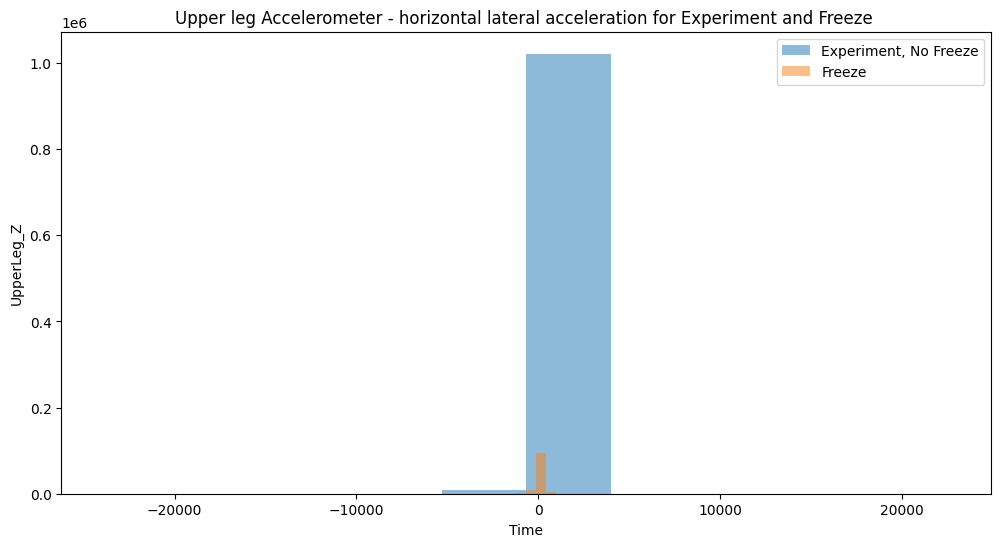

In [ ]:
# Visualize accelerometer values for freezing and normal walking
plt.figure(figsize=(12, 6))
plt.hist(full_dataset[full_dataset['Annotations'] == 1]['UpperLeg_Z'], label='Experiment, No Freeze', alpha=0.5)
plt.hist(full_dataset[full_dataset['Annotations'] == 2]['UpperLeg_Z'], label='Freeze', alpha=0.5)
plt.title('Upper leg Accelerometer - horizontal lateral acceleration for Experiment and Freeze ')
plt.xlabel('Time')
plt.ylabel('UpperLeg_Z')
plt.legend()
plt.show()

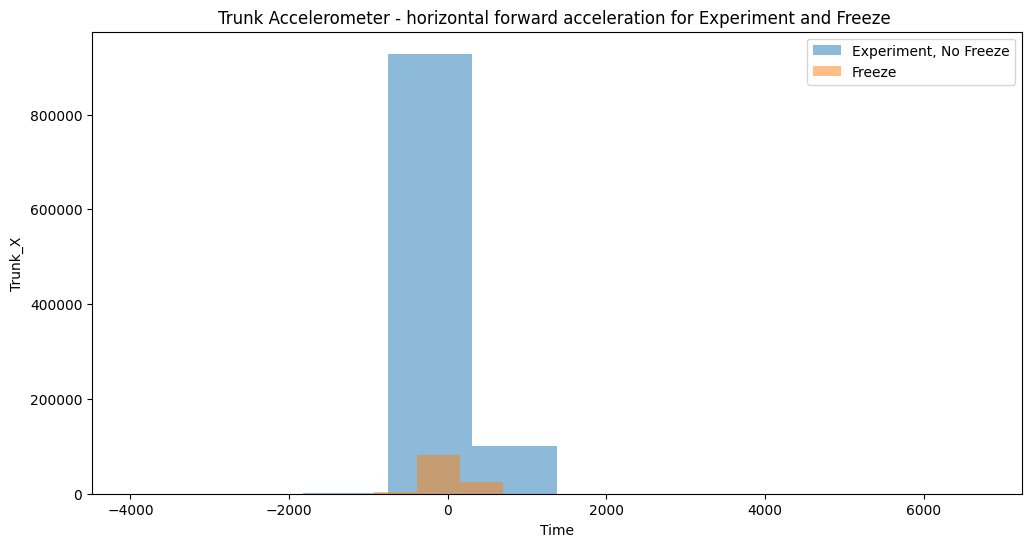

In [ ]:
# Visualize accelerometer values for freezing and normal walking
plt.figure(figsize=(12, 6))
plt.hist(full_dataset[full_dataset['Annotations'] == 1]['Trunk_X'], label='Experiment, No Freeze', alpha=0.5)
plt.hist(full_dataset[full_dataset['Annotations'] == 2]['Trunk_X'], label='Freeze', alpha=0.5)
plt.title('Trunk Accelerometer - horizontal forward acceleration for Experiment and Freeze ')
plt.xlabel('Time')
plt.ylabel('Trunk_X')
plt.legend()
plt.show()

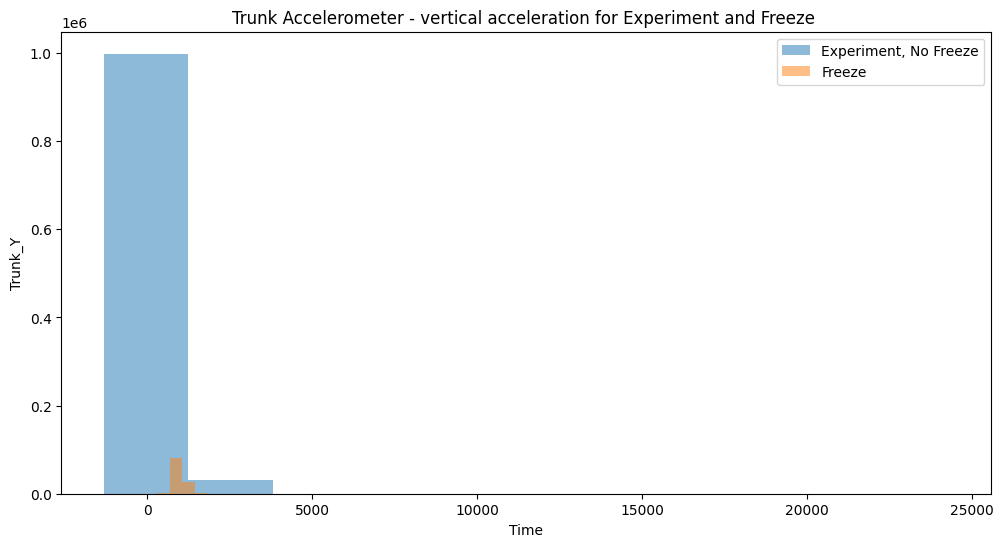

In [ ]:
# Visualize accelerometer values for freezing and normal walking
plt.figure(figsize=(12, 6))
plt.hist(full_dataset[full_dataset['Annotations'] == 1]['Trunk_Y'], label='Experiment, No Freeze', alpha=0.5)
plt.hist(full_dataset[full_dataset['Annotations'] == 2]['Trunk_Y'], label='Freeze', alpha=0.5)
plt.title('Trunk Accelerometer - vertical acceleration for Experiment and Freeze ')
plt.xlabel('Time')
plt.ylabel('Trunk_Y')
plt.legend()
plt.show()

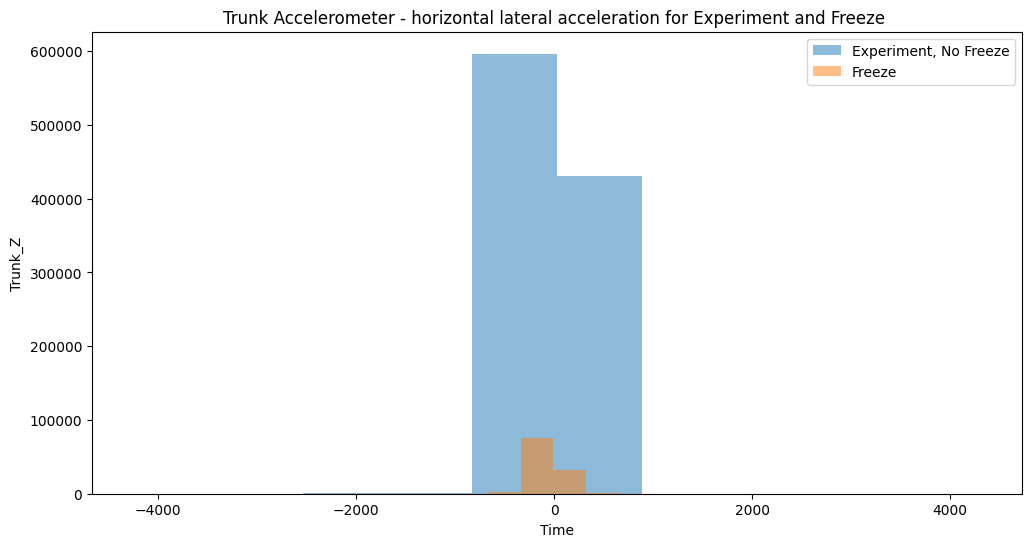

In [ ]:
# Visualize accelerometer values for freezing and normal walking
plt.figure(figsize=(12, 6))
plt.hist(full_dataset[full_dataset['Annotations'] == 1]['Trunk_Z'], label='Experiment, No Freeze', alpha=0.5)
plt.hist(full_dataset[full_dataset['Annotations'] == 2]['Trunk_Z'], label='Freeze', alpha=0.5)
plt.title('Trunk Accelerometer - horizontal lateral acceleration for Experiment and Freeze ')
plt.xlabel('Time')
plt.ylabel('Trunk_Z')
plt.legend()
plt.show()

In [ ]:
# Create a Model to Predict the Probability of Freezing

# Preprocess the data
X = full_dataset[['Ankle_X', 'Ankle_Y', 'Ankle_Z',
                  'UpperLeg_X', 'UpperLeg_Y', 'UpperLeg_Z',
                  'Trunk_X', 'Trunk_Y', 'Trunk_Z']]
y = full_dataset['Annotations'].apply(lambda x: 1 if x == 2 else 0)  # 1 for freeze, 0 for experiment, no freeze

# Print the shape of X before any preprocessing
print("Shape of X before preprocessing:", X.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of X_train before any preprocessing
print("Shape of X_train before preprocessing:", X_train.shape)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle missing values with median imputation
imputer = SimpleImputer(strategy='median')  # Use median imputation
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Check for missing values after imputation
print("Number of missing values in X_train_imputed after imputation:", np.isnan(X_train_imputed).sum().sum())
print("Number of missing values in X_test_imputed after imputation:", np.isnan(X_test_imputed).sum().sum())

# Choose a model and train it
model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Shape of X before preprocessing: (1917887, 9)
Shape of X_train before preprocessing: (1534309, 9)
Number of missing values in X_train_imputed after imputation: 0
Number of missing values in X_test_imputed after imputation: 0
Accuracy: 0.9529144007216264
Confusion Matrix:
[[359387   2072]
 [ 15989   6130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    361459
           1       0.75      0.28      0.40     22119

    accuracy                           0.95    383578
   macro avg       0.85      0.64      0.69    383578
weighted avg       0.95      0.95      0.94    383578

